In [32]:
# Dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

rds_connection_string = "postgres:postgres@localhost:5432/EmployeeSQL1"
engine = create_engine(f'postgresql://{rds_connection_string}')
connection = engine.connect()

In [6]:
# Import the Employees table
employees = pd.read_sql('select * from employees', connection, parse_dates=['birth_date', 'hire_date'])

In [7]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [8]:
# Import the Departments table
departments = pd.read_sql('select * from departments', connection)

In [9]:
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [10]:
# Import the Salaries table
salaries = pd.read_sql('select * from salaries', connection, parse_dates=['from_date', 'to_date'])

In [11]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [12]:
# Import the Department Manager table
dept_manager = pd.read_sql('select * from dept_manager', connection, parse_dates=['from_date', 'to_date'])

In [13]:
dept_manager.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,NaT
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,NaT
4,d003,110183,1985-01-01,1992-03-21


In [14]:
# Replace null dates
dept_manager.to_date = dept_manager['to_date'].fillna(pd.to_datetime('2050-12-31'))

In [15]:
dept_manager.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,2050-12-31
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,2050-12-31
4,d003,110183,1985-01-01,1992-03-21


In [16]:
# Import the Titles table
titles = pd.read_sql('select * from titles', connection, parse_dates=['from_date', 'to_date'])

In [17]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [18]:
# Replace null dates
titles.to_date = titles['to_date'].fillna(pd.to_datetime('2050-12-31'))

In [19]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,2050-12-31
1,10002,Staff,1996-08-03,2050-12-31
2,10003,Senior Engineer,1995-12-03,2050-12-31
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,2050-12-31


In [20]:
# Count by title
titles.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

## Average salary by title

In [21]:
# Create a merged dataframe of titles and salaries
employee_salaries = titles.merge(salaries, on='emp_no')

In [22]:
employee_salaries.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,2050-12-31,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,2050-12-31,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,2050-12-31,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,2050-12-31,40054,1986-12-01,1987-12-01


In [23]:
# Filter the columns you want to use
employee_salaries_df = employee_salaries[['emp_no', 'title', 'salary']]

In [24]:
employee_salaries_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Engineer,40054
4,10004,Senior Engineer,40054


In [25]:
employee_salaries_df.groupby('title')['salary'].mean().round(2)

title
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: salary, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1D0527648>]],
      dtype=object)

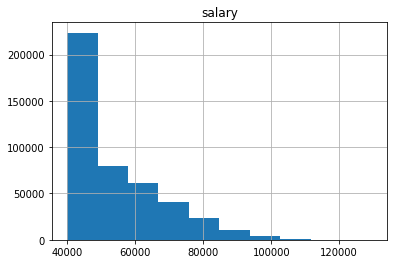

In [28]:
# Plot data
employee_salaries_df.hist(column='salary')

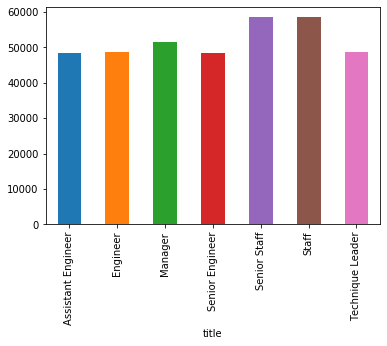

In [34]:
employees_grouped_by_title = employee_salaries_df.groupby(['title'])['salary'].mean()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

employees_grouped_by_title.plot.bar(color=colors)